# Project Report: Analysis of Student Performance
## Objective:
The goal of this project was to analyze the factors influencing student performance, specifically focusing on their math_score and reading_score. We aimed to identify if variables such as gender, attendance rate, and study hours have a significant impact on student performance, using statistical techniques such as correlation analysis and regression modeling.

## Data Overview:
The dataset provided includes information about students and various factors that might influence their academic performance. The key variables of interest in this analysis were:

math_score: A numerical score representing the student's math performance.

reading_score: A numerical score representing the student's reading performance.

gender: A categorical variable (Male, Female, Other) representing the gender of the student.

attendance_rate: The attendance rate of the student as a percentage.

study_hours: The number of hours the student spends studying per week.

parent_education: The educational background of the student's parents.

The data consists of 1,000 student records.

## Exploratory Data Analysis:
## Data Cleaning:

The data was cleaned to handle missing values and ensure that all variables were in the correct format for analysis. Non-numeric categorical variables were encoded into numeric values where necessary (e.g., gender was transformed using one-hot encoding).

After checking for missing values, rows with missing data were removed to ensure the integrity of the analysis.

## Descriptive Statistics:

Summary statistics were calculated for the numeric variables (math_score, reading_score, attendance_rate, and study_hours), and frequency distributions were examined for categorical variables like gender and parent_education.

The distribution of scores showed normal-like patterns for math_score and reading_score.

## Statistical Analysis:
1. Correlation Analysis:
We performed correlation analysis to explore the relationships between math_score and other variables (e.g., attendance_rate, study_hours).

Results:

Math Score and Attendance Rate: A weak negative correlation (-0.018) was observed, suggesting that attendance rate has a minimal effect on math scores.

Math Score and Study Hours: An almost negligible negative correlation (-0.002), indicating that study hours do not significantly influence math scores.

2. ANOVA (Analysis of Variance):
We performed ANOVA tests to evaluate the significance of categorical variables (gender, parent_education) on math_score and reading_score.

Reading Score and Gender: The test showed that gender did not significantly impact reading scores, with a P-value of 0.328.

Math Score and Parent Education: The analysis did not find any significant difference in math scores based on the parent's education level.

3. OLS Regression:
Multiple OLS regressions were run to evaluate the relationship between student performance (math_score and reading_score) and several predictors.

Math Score Model:

Gender showed a statistically significant negative relationship with math scores (P-value = 0.016).

Attendance rate showed a marginally significant negative effect on math scores (P-value = 0.066).

Study hours had no significant effect on math scores (P-value = 0.507).

Reading Score Model:

No significant relationships were found between gender, attendance rate, or study hours and reading scores. All predictors had high P-values, indicating no significant effect.

The model had poor explanatory power, with an R-squared of only 0.002.

## Key Findings:
1. Limited Impact of Attendance and Study Hours:

The analysis revealed weak correlations and minimal impact of both attendance rate and study hours on math_score and reading_score.

This suggests that other factors not captured in the dataset may play a more significant role in student performance.

2. Gender's Effect on Math Score:

There was a statistically significant negative relationship between gender and math_score, where male students had slightly lower math scores compared to females. However, this effect was not large, and its practical significance is limited.

3. Poor Model Fit:

Both regression models for math_score and reading_score showed low R-squared values, indicating that the independent variables in the models do not explain much of the variation in student performance. This suggests that other important factors (e.g., study methods, socioeconomic status, school environment) are likely influencing student performance but are not captured in this analysis.

4. Multicollinearity Issues:

The high condition number in the regression models indicated potential multicollinearity, meaning that some of the predictors might be highly correlated with each other. This could affect the accuracy of the regression coefficients.

## Conclusion:
The analysis suggests that gender, attendance rate, and study hours do not have a strong or significant impact on student performance in this dataset. The regression models showed low explanatory power, and there was evidence of multicollinearity. Additional variables or alternative analytical approaches (e.g., incorporating more diverse factors like social factors or academic interventions) might be necessary to build a more robust model that can better explain the variability in student performance.

Recommendations:
Incorporate Additional Variables: To improve the model, consider adding more factors such as socioeconomic status, study habits, or teacher quality.

Further Exploration of Gender: While the effect of gender on math_score was statistically significant, it is minimal. A deeper exploration of other demographic variables might reveal more meaningful insights.

Data Quality Improvement: To address the multicollinearity and improve model accuracy, it may help to examine the correlations between independent variables and either remove or combine correlated predictors.

This analysis is a starting point for understanding student performance and suggests that more comprehensive data is needed to uncover meaningful insights.

In [1]:
#Import libraries
import pandas as pd
import os
# define the folder path
folder_path = r"C:\Users\aseif\Documents\student_data_explore"
os.makedirs(folder_path, exist_ok=True) #Create folder if it doesnt exist
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


#save DataFrame to csv
#{df_name}.to_csv(os.path.join(folder_path, '{file_name.csv}'), index=False)

In [2]:
#Load Data
df = pd.read_csv(r"C:\Users\aseif\OneDrive\Desktop\Data\student_info_dataset.csv")
df.to_csv(os.path.join(folder_path, 'df_student_info.csv'), index=False)

In [30]:
#df.head()

In [28]:
#clean the data
#Check for missing values, duplicates, and inconcictent data
#df.isnull().sum() #missing values


In [29]:
#df.drop_duplicates() #dropping duplicates

In [6]:
#summarize the data -check the distribution of numeric features(mean, median,etc) 
# and categorical features(values counts
df_description = df.describe()
df_description.to_csv(os.path.join(folder_path, 'df_description.csv'), index=False)
df_description

,age,grade_level,math_score,reading_score,writing_score,attendance_rate,study_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,15.999000,10.473000,75.165000,74.293000,75.150000,89.879179,2.978380
std,0.817109,1.136029,14.304349,14.312652,14.395094,5.725007,1.167780
min,15.000000,9.000000,50.000000,50.000000,50.000000,80.000614,1.015673
25%,15.000000,9.000000,63.000000,62.000000,63.000000,84.971772,1.955287
50%,16.000000,10.000000,75.000000,74.000000,75.000000,89.980889,2.962665
75%,17.000000,12.000000,88.000000,86.000000,88.000000,94.629778,3.994360
max,17.000000,12.000000,99.000000,99.000000,99.000000,99.954988,4.997843


In [7]:
categorical_columns = ['gender', 'parent_education', 'internet_access', 'lunch_type', 'extra_activities']

# Calculate the frequency of each category in each categorical column
categorical_summary = df[categorical_columns].apply(pd.Series.value_counts)

categorical_summary.to_csv(os.path.join(folder_path, 'categorical_summary.csv'), index=False)
# Display the result
categorical_summary


,gender,parent_education,internet_access,lunch_type,extra_activities
Bachelor's,NaN,274.0,NaN,NaN,NaN
Female,326.0,NaN,NaN,NaN,NaN
Free or reduced,NaN,NaN,NaN,498.0,NaN
High School,NaN,245.0,NaN,NaN,NaN
Male,355.0,NaN,NaN,NaN,NaN
Master's,NaN,227.0,NaN,NaN,NaN
No,NaN,NaN,500.0,NaN,465.0
Other,319.0,NaN,NaN,NaN,NaN
PhD,NaN,254.0,NaN,NaN,NaN
Standard,NaN,NaN,NaN,502.0,NaN


In [8]:
#Check the correlation between scores (math_score, reading_score, writing_score)
#and other numeric features like attendance_rate and study_hours.
# Selecting numeric columns for correlation analysis
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours']

# Calculating the correlation matrix for these numeric columns
correlation_matrix = df[numeric_columns].corr()
correlation_matrix.to_csv(os.path.join(folder_path, 'correlation_matrix.csv'), index=False)

correlation_matrix

,math_score,reading_score,writing_score,attendance_rate,study_hours
math_score,1.000000,-0.038994,0.005271,-0.060520,0.021366
reading_score,-0.038994,1.000000,-0.007856,-0.017817,-0.001552
writing_score,0.005271,-0.007856,1.000000,0.040184,0.034220
attendance_rate,-0.060520,-0.017817,0.040184,1.000000,-0.036650
study_hours,0.021366,-0.001552,0.034220,-0.036650,1.000000


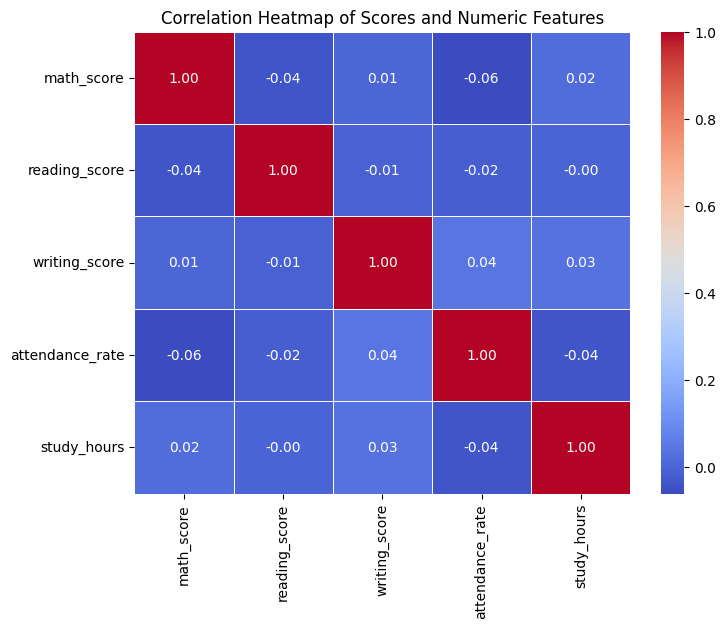

In [9]:
#plotting the heatmap for corr matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Scores and Numeric Features")
plt.show()


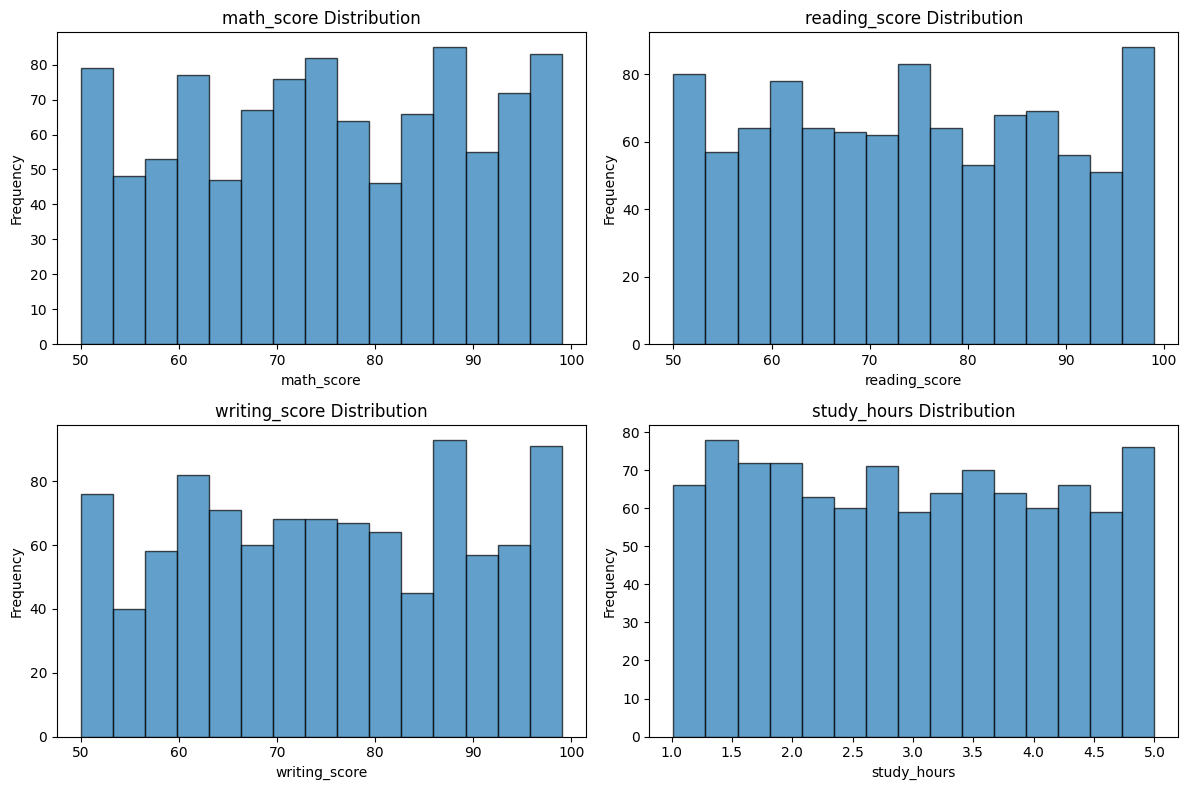

In [10]:
# Plotting histograms for numeric columns
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'study_hours']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=15, edgecolor='black', alpha=0.7)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


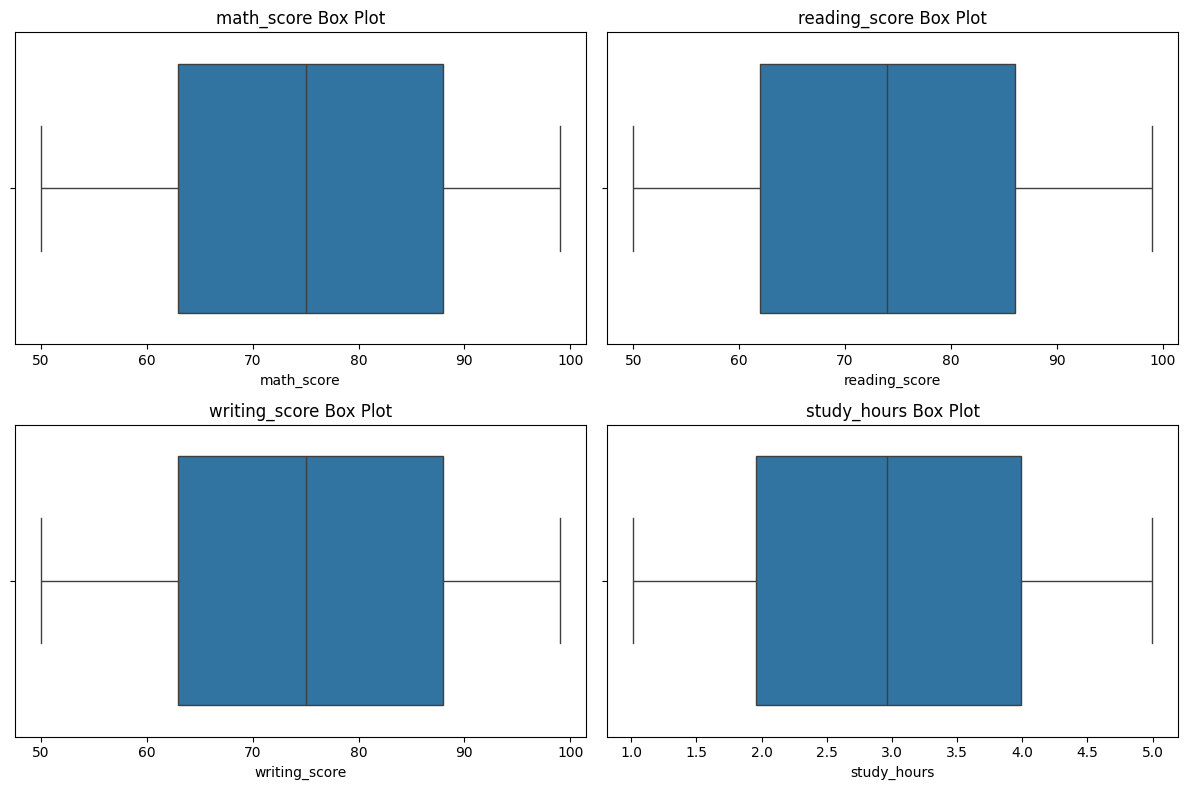

In [11]:
# Plotting box plots for numeric columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Box Plot')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


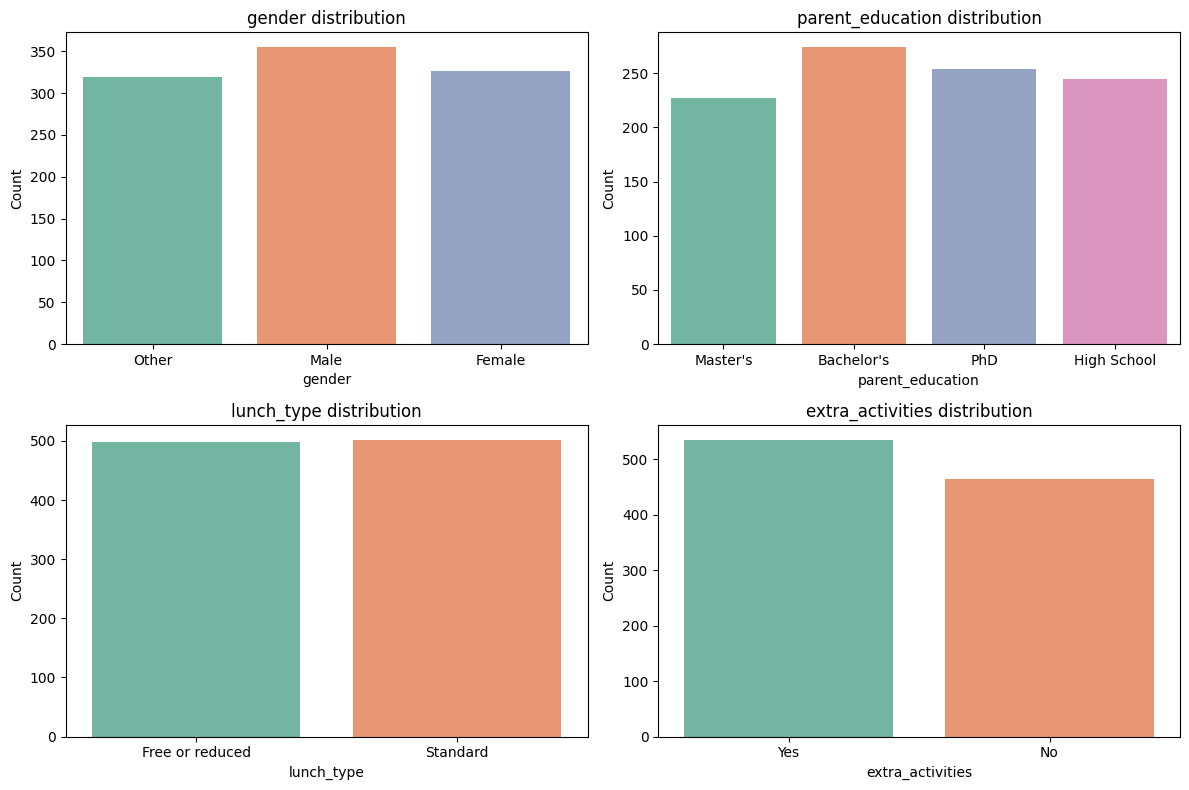

In [32]:
# Plotting bar charts for categorical columns
categorical_columns = ['gender', 'parent_education', 'lunch_type', 'extra_activities']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], hue=df[col], palette='Set2', legend=False)

    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [13]:
#group analysis

# Now proceed with the grouping and analysis
grouped_by_gender = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours']].mean()
grouped_by_gender.to_csv(os.path.join(folder_path, 'grouped_gender.csv'), index=False)

grouped_by_parent_education = df.groupby('parent_education')[['math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours']].mean()
grouped_by_parent_education.to_csv(os.path.join(folder_path, 'grouped_parent_info.csv'), index=False)
grouped_by_lunch_type = df.groupby('lunch_type')[['math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours']].mean()
grouped_by_lunch_type.to_csv(os.path.join(folder_path, 'grouped_lunch_type.csv'), index=False)
# Display the grouped data for comparison
grouped_by_lunch_type

,math_score,reading_score,writing_score,attendance_rate,study_hours
lunch_type,,,,,
Free or reduced,74.867470,74.608434,74.401606,90.280202,2.965629
Standard,75.460159,73.980080,75.892430,89.481352,2.991029


In [14]:
grouped_by_gender

,math_score,reading_score,writing_score,attendance_rate,study_hours
gender,,,,,
Female,74.420245,74.404908,75.128834,90.125549,2.957686
Male,76.771831,75.014085,74.267606,89.629485,2.957170
Other,74.137931,73.376176,76.153605,89.905276,3.023132


In [15]:
grouped_by_parent_education

,math_score,reading_score,writing_score,attendance_rate,study_hours
parent_education,,,,,
Bachelor's,75.627737,74.328467,75.218978,89.833242,2.957392
High School,75.404082,73.453061,76.461224,90.244511,2.961886
Master's,73.242291,73.651982,75.070485,89.643861,2.925971
PhD,76.153543,75.637795,73.881890,89.786650,3.063770


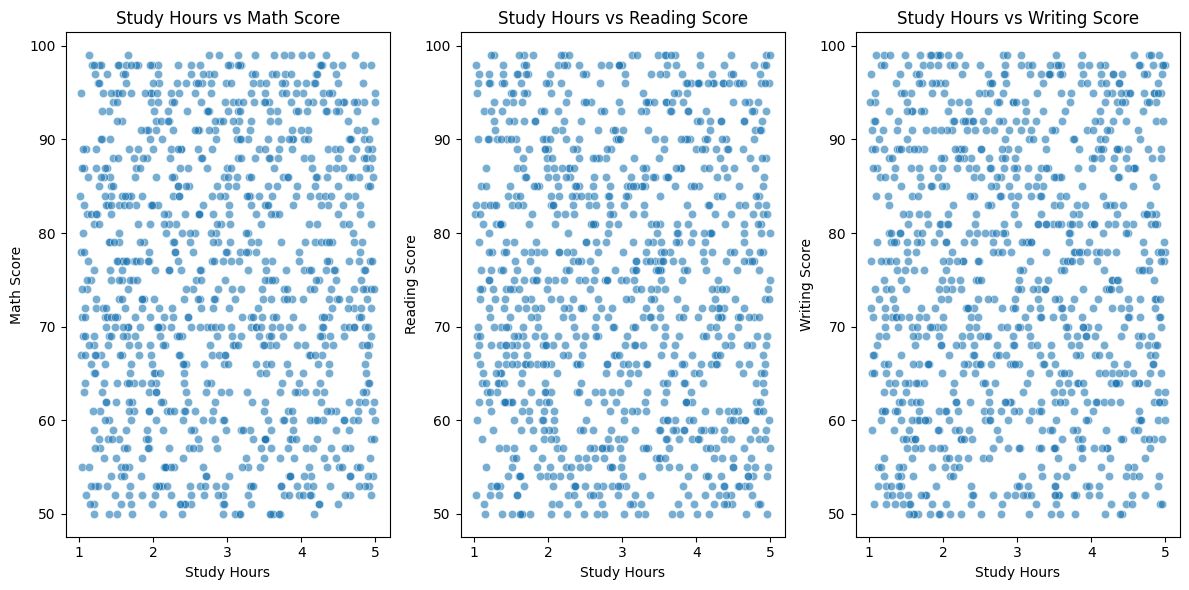

In [16]:
# Grouping the data by study_hours and calculating the mean scores for each group
study_hours_performance = df.groupby('study_hours')[['math_score', 'reading_score', 'writing_score', 'attendance_rate']].mean()

# Scatter plot to show relationship between study_hours and math_score, reading_score, and writing_score
plt.figure(figsize=(12, 6))

# Scatter plot for Math Scores
plt.subplot(1, 3, 1)
plt.scatter(df['study_hours'], df['math_score'], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Study Hours vs Math Score")
plt.xlabel("Study Hours")
plt.ylabel("Math Score")

# Scatter plot for Reading Scores
plt.subplot(1, 3, 2)
plt.scatter(df['study_hours'], df['reading_score'], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Study Hours vs Reading Score")
plt.xlabel("Study Hours")
plt.ylabel("Reading Score")

# Scatter plot for Writing Scores
plt.subplot(1, 3, 3)
plt.scatter(df['study_hours'], df['writing_score'], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Study Hours vs Writing Score")
plt.xlabel("Study Hours")
plt.ylabel("Writing Score")

plt.tight_layout()
plt.show()

# Displaying the grouped data (mean performance based on study hours)
study_hours_performance
study_hours_performance.to_csv(os.path.join(folder_path, 'study_hours_performance.csv'), index=False)


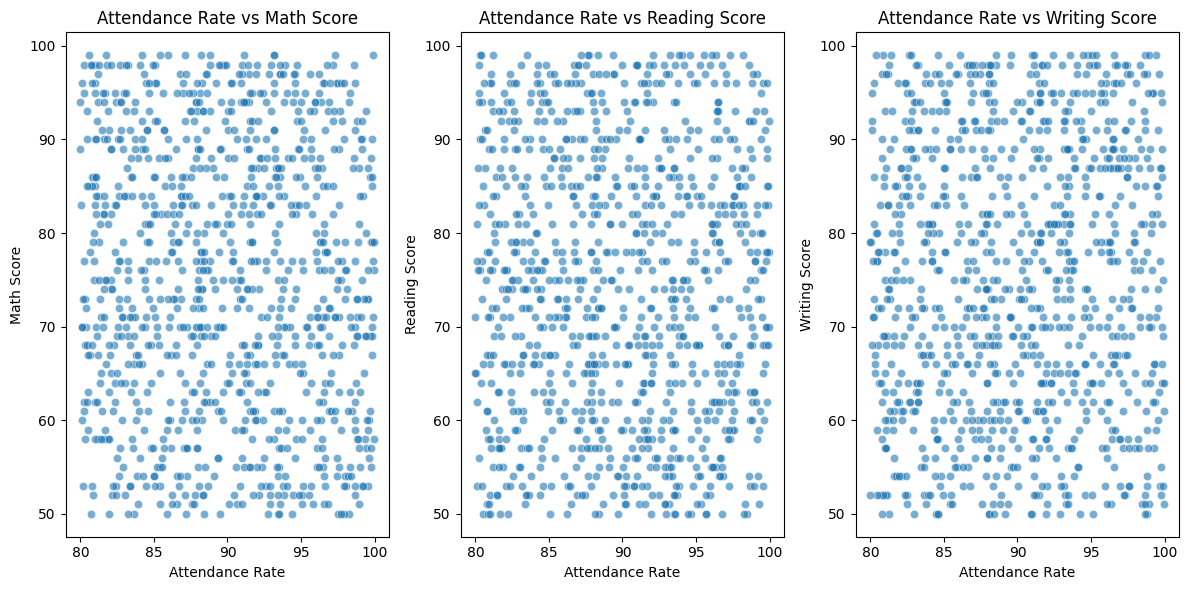

In [17]:
# Grouping the data by attendance_rate and calculating the mean scores for each group
attendance_performance = df.groupby('attendance_rate')[['math_score', 'reading_score', 'writing_score', 'study_hours']].mean()

# Scatter plot to show relationship between attendance_rate and math_score, reading_score, and writing_score
plt.figure(figsize=(12, 6))

# Scatter plot for Math Scores
plt.subplot(1, 3, 1)
plt.scatter(df['attendance_rate'], df['math_score'], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Attendance Rate vs Math Score")
plt.xlabel("Attendance Rate")
plt.ylabel("Math Score")

# Scatter plot for Reading Scores
plt.subplot(1, 3, 2)
plt.scatter(df['attendance_rate'], df['reading_score'], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Attendance Rate vs Reading Score")
plt.xlabel("Attendance Rate")
plt.ylabel("Reading Score")

# Scatter plot for Writing Scores
plt.subplot(1, 3, 3)
plt.scatter(df['attendance_rate'], df['writing_score'], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title("Attendance Rate vs Writing Score")
plt.xlabel("Attendance Rate")
plt.ylabel("Writing Score")

plt.tight_layout()
plt.show()

# Displaying the grouped data (mean performance based on attendance_rate)
attendance_performance
attendance_performance.to_csv(os.path.join(folder_path, 'attendance_performance.csv'), index=False)

                  math_score  reading_score
parent_education                           
Bachelor's         75.627737      74.328467
High School        75.404082      73.453061
Master's           73.242291      73.651982
PhD                76.153543      75.637795


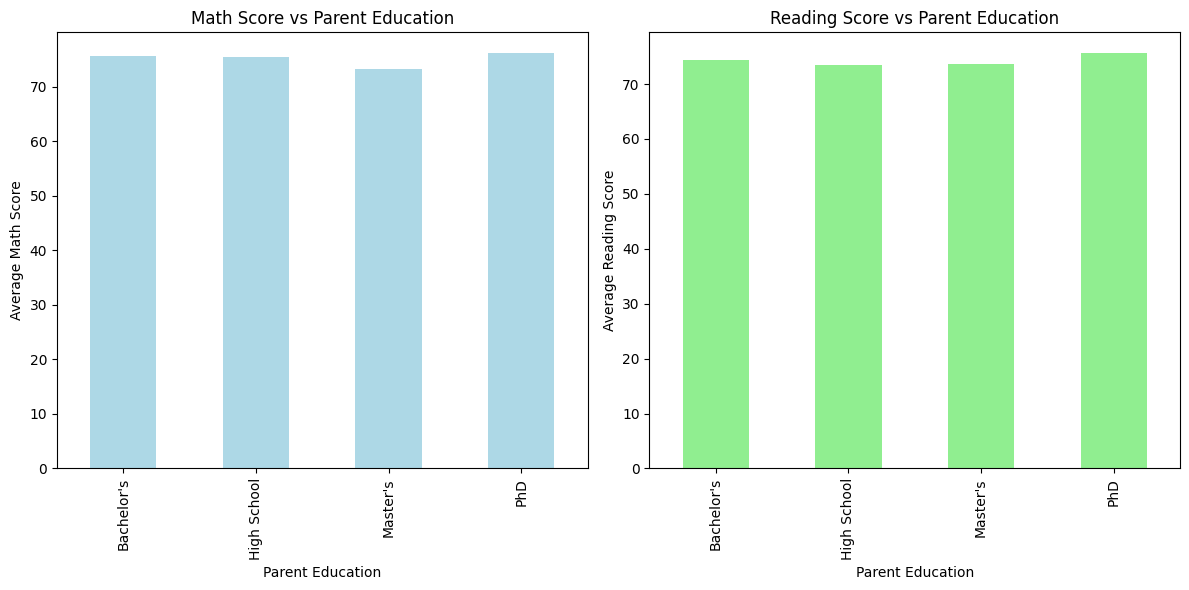

In [18]:
# Group the data by parent_education and calculate the mean of math_score and reading_score
parent_education_performance = df.groupby('parent_education')[['math_score', 'reading_score']].mean()
parent_education_performance.to_csv(os.path.join(folder_path, 'parent_education_performance.csv'), index=False)
# Display the grouped data for parent_education and mean scores
print(parent_education_performance)

# Visualizing the relationship with bar plots for better comparison
plt.figure(figsize=(12, 6))

# Bar plot for Math Scores by Parent Education
plt.subplot(1, 2, 1)
parent_education_performance['math_score'].plot(kind='bar', color='lightblue')
plt.title("Math Score vs Parent Education")
plt.xlabel("Parent Education")
plt.ylabel("Average Math Score")

# Bar plot for Reading Scores by Parent Education
plt.subplot(1, 2, 2)
parent_education_performance['reading_score'].plot(kind='bar', color='lightgreen')
plt.title("Reading Score vs Parent Education")
plt.xlabel("Parent Education")
plt.ylabel("Average Reading Score")

plt.tight_layout()
plt.show()

Hypothesis for ANOVA Test:
Null Hypothesis (H0): The means of math_score (or reading_score) are equal across the different categories of parent_education.

Alternative Hypothesis (H1): At least one of the means of math_score (or reading_score) is different across the categories of parent_education.

In [19]:
# Group the data by 'parent_education' and get the 'math_score' for each group
grouped_by_parent_education = [group['math_score'].dropna() for name, group in df.groupby('parent_education')]

# Perform ANOVA to check if the means of math_score are significantly different across 'parent_education'
anova_result = stats.f_oneway(*grouped_by_parent_education)

# Display the ANOVA result
print(f'ANOVA Result for Math Score and Parent Education:')
print(f'F-statistic: {anova_result.statistic}')
print(f'P-value: {anova_result.pvalue}')

# Hypothesis Test Interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the means of math_score based on parent_education.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of math_score based on parent_education.")

ANOVA Result for Math Score and Parent Education:
F-statistic: 1.8949166899876517
P-value: 0.1287371709607277
Fail to reject the null hypothesis: There is no significant difference between the means of math_score based on parent_education.


## Summary of Results:
The ANOVA test was conducted to assess whether there is a significant difference in the mean math_score across different levels of parent_education.

F-statistic: 1.89

P-value: 0.13

Interpretation:
The P-value is greater than the commonly used significance level of 0.05.

Since the P-value (0.13) is above 0.05, we fail to reject the null hypothesis.

Conclusion: There is no statistically significant difference in the mean math_score based on the levels of parent_education.

This means that, based on this data, we cannot conclude that the level of education of a student's parents has a significant impact on their math_score.

In [20]:
# Group the data by 'parent_education' and get the 'reading_score' for each group
grouped_by_parent_education = [group['reading_score'].dropna() for name, group in df.groupby('parent_education')]

# Perform ANOVA to check if the means of math_score are significantly different across 'parent_education'
anova_result = stats.f_oneway(*grouped_by_parent_education)

# Display the ANOVA result
print(f'ANOVA Result for Reading Score and Parent Education:')
print(f'F-statistic: {anova_result.statistic}')
print(f'P-value: {anova_result.pvalue}')

# Hypothesis Test Interpretation
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the means of reading_score based on parent_education.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of reading_score based on parent_education.")

ANOVA Result for Reading Score and Parent Education:
F-statistic: 1.1816906439847445
P-value: 0.31554048436731874
Fail to reject the null hypothesis: There is no significant difference between the means of reading_score based on parent_education.


## Summary of Results for Reading Score and Parent Education:
The ANOVA test was conducted to assess whether there is a significant difference in the mean reading_score across different levels of parent_education.

F-statistic: 1.18

P-value: 0.32

Interpretation:
The P-value is greater than the commonly used significance level of 0.05.

Since the P-value (0.32) is above 0.05, we fail to reject the null hypothesis.

Conclusion: There is no statistically significant difference in the mean reading_score based on the levels of parent_education.

This means that, based on this data, we cannot conclude that the level of education of a student's parents has a significant impact on their reading_score.

In [21]:
# ANOVA for Catergorical Variables

# Group the data by 'gender' and get the 'reading_score' for each group
grouped_by_gender = [group['reading_score'].dropna() for name, group in df.groupby('gender')]

# Perform ANOVA for 'reading_score' and 'gender'
anova_result_gender = stats.f_oneway(*grouped_by_gender)

print(f'ANOVA Result for Reading Score and Gender:')
print(f'F-statistic: {anova_result_gender.statistic}')
print(f'P-value: {anova_result_gender.pvalue}')

# Hypothesis Test Interpretation
if anova_result_gender.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the means of reading_score based on gender.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of reading_score based on gender.")


ANOVA Result for Reading Score and Gender:
F-statistic: 1.1152337290630228
P-value: 0.3282472650386731
Fail to reject the null hypothesis: There is no significant difference between the means of reading_score based on gender.


## Summary of Results for Reading Score and Gender:
The ANOVA test was conducted to assess whether there is a significant difference in the mean reading_score between different genders.

F-statistic: 1.12

P-value: 0.33

Interpretation:
The P-value is greater than the commonly used significance level of 0.05.

Since the P-value (0.33) is above 0.05, we fail to reject the null hypothesis.

Conclusion: There is no statistically significant difference in the mean reading_score based on gender.

This indicates that, based on this data, gender does not have a significant impact on the students' reading_score.


In [22]:
# Calculate the correlation between 'reading_score' and other continuous variables
correlation_attendance = df['reading_score'].corr(df['attendance_rate'])
correlation_study_hours = df['reading_score'].corr(df['study_hours'])

print(f'Correlation between Reading Score and Attendance Rate: {correlation_attendance}')
print(f'Correlation between Reading Score and Study Hours: {correlation_study_hours}')

Correlation between Reading Score and Attendance Rate: -0.01781733195807089
Correlation between Reading Score and Study Hours: -0.0015524627221098464


## Summary of Correlation Results:
Correlation between Reading Score and Attendance Rate:

Correlation Coefficient: -0.018

This indicates a very weak negative correlation between reading_score and attendance_rate. As attendance increases, there is a very slight decrease in the reading score, although the relationship is extremely weak and practically negligible.

Correlation between Reading Score and Study Hours:

Correlation Coefficient: -0.002

This shows an almost no correlation between reading_score and study_hours. The negative value is so close to zero that it suggests no meaningful relationship between the amount of study hours and reading performance.

Conclusion:
Both correlations are very weak and essentially indicate that attendance rate and study hours do not have a significant relationship with reading_score in this dataset.

These results suggest that there may be other factors influencing the reading score that are not captured by just attendance and study hours.

In [23]:
df1 = df.copy()
df1.to_csv(os.path.join(folder_path, 'df_student_info_genderdummies.csv'), index=False)

In [24]:
# Example of converting 'gender' column to numeric (if it exists as a string)
df1['gender'] = df1['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# Ensure that 'attendance_rate' and 'study_hours' are numeric
df1['attendance_rate'] = pd.to_numeric(df1['attendance_rate'], errors='coerce')
df1['study_hours'] = pd.to_numeric(df1['study_hours'], errors='coerce')

# Drop rows with NaN values (if any)
df1 = df1.dropna()


In [25]:

# Prepare the independent variables (X) and dependent variable (y)
X = df1[['gender', 'attendance_rate', 'study_hours']]  # Ensure these columns are numeric
y = df1['reading_score']  # Dependent variable

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model_reading = sm.OLS(y, X).fit()

# Get the regression results
print(model_reading.summary())


                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8222
Date:                Fri, 06 Jun 2025   Prob (F-statistic):              0.482
Time:                        12:18:09   Log-Likelihood:                -4078.3
No. Observations:                1000   AIC:                             8165.
Df Residuals:                     996   BIC:                             8184.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              78.9108      7.274     

# Summary of OLS Regression Results:
### Reading Scores

The Ordinary Least Squares (OLS) regression was conducted to analyze the relationship between the independent variables (gender, attendance_rate, and study_hours) and the dependent variable reading_score.

Key Findings:
R-squared: 0.002

This indicates that the independent variables (gender, attendance_rate, and study_hours) explain only 0.2% of the variance in reading_score. This suggests that these variables do not explain much of the variability in reading scores.

Coefficients and Statistical Significance:

Constant (Intercept): 78.91
The intercept suggests that the baseline reading_score is 78.91 when all predictors are zero.

Gender: -0.81
The negative coefficient indicates that being male (or the value represented by the dummy variable for gender) is associated with a decrease of 0.81 in the reading_score. However, this effect is not statistically significant (P-value = 0.143).

Attendance Rate: -0.0423
A decrease in attendance_rate is associated with a decrease in reading_score, but the relationship is not statistically significant (P-value = 0.594).

Study Hours: -0.0137
The effect of study_hours on reading_score is almost negligible and statistically insignificant (P-value = 0.972).

Statistical Tests:

F-statistic: 0.822 with a P-value of 0.482, suggesting that the overall regression model is not statistically significant. This means that the predictors (gender, attendance_rate, study_hours) do not explain the variability in reading_score in a statistically meaningful way.

Model Fit:

The Adj. R-squared is -0.001, which suggests that the model performs poorly after adjusting for the number of predictors.

The AIC and BIC values (8165 and 8184, respectively) are relatively high, indicating a poor fit of the model.

Additional Notes:

Multicollinearity: The condition number (1.45e+03) suggests that there might be multicollinearity issues in the model, meaning some of the predictors may be highly correlated with each other.

Durbin-Watson statistic: The value is 2.114, indicating that there is no significant autocorrelation in the residuals.

Conclusion:
The model suggests that gender, attendance_rate, and study_hours do not have a significant relationship with reading_score in this dataset.

The overall model fit is poor, with a very low R-squared and an insignificant F-statistic.

Multicollinearity might be present, which could explain the poor performance of the model.

In [26]:

# Prepare the independent variables (X) and dependent variable (y)
X = df1[['gender', 'attendance_rate', 'study_hours']]  # Ensure these columns are numeric
y = df1['math_score']  # Dependent variable

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model_math = sm.OLS(y, X).fit()

# Get the regression results
print(model_math.summary())


                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.279
Date:                Fri, 06 Jun 2025   Prob (F-statistic):             0.0204
Time:                        12:18:11   Log-Likelihood:                -4074.1
No. Observations:                1000   AIC:                             8156.
Df Residuals:                     996   BIC:                             8176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              88.7415      7.243     

## Summary of OLS Regression Results:
### Math Scores
The Ordinary Least Squares (OLS) regression was conducted to analyze the relationship between the independent variables (gender, attendance_rate, and study_hours) and the dependent variable math_score.

Key Findings:
R-squared: 0.010

This indicates that the independent variables (gender, attendance_rate, and study_hours) explain only 1% of the variance in math_score. This suggests that these variables do not explain much of the variability in math scores.

Coefficients and Statistical Significance:

Constant (Intercept): 88.74
This is the predicted value of math_score when all independent variables are zero.

Gender: -1.32
The negative coefficient indicates that being male (or whatever value is represented by the numeric coding for gender) is associated with a decrease of 1.32 in the math_score, and this effect is statistically significant (P-value = 0.016).

Attendance Rate: -0.145
A decrease in attendance rate is associated with a decrease in math_score, but the relationship is marginally non-significant with a P-value of 0.066 (slightly above the usual 0.05 threshold for significance).

Study Hours: 0.257
Study hours show a positive but non-significant relationship with math_score (P-value = 0.507).

Statistical Tests:

F-statistic: 3.279 with a P-value of 0.0204, suggesting that the overall regression model is statistically significant at the 5% significance level.

The P-values for individual variables:

gender: 0.016 (significant)

attendance_rate: 0.066 (marginally significant)

study_hours: 0.507 (not significant)

Model Fit:

The Adj. R-squared (0.007) indicates that after adjusting for the number of predictors, the model explains a very small portion of the variance in math_score.

Additional Notes:

Multicollinearity: The condition number (1.45e+03) suggests that there might be multicollinearity issues in the model, meaning that some of the predictors could be highly correlated with each other.

The Durbin-Watson statistic is close to 2 (1.996), which suggests that there is no significant autocorrelation in the residuals.

Conclusion:
The model suggests that gender has a statistically significant relationship with math_score, while attendance_rate and study_hours show weak or non-significant relationships with math_score.

The model overall has a low explanatory power (R-squared = 0.01), indicating that other factors not included in this model likely explain a larger portion of the variation in math_score.